# Scripts for analysis performed in 'Enrichment of surface ice stable water isotope ratios following sublimation'

These are the calculations for our manuscript on sublimation. We are excited to share our work with you.

-Donovan and Shivani

Here we set the working directory and install/import some of the necessary packages for our analysis. Setting the working directory tells the program where to find the data source files. The installed packages are the tools and functions that we will use to unpack and assess our data.

In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.3.2"

Now we import the data we would like to share regarding our standards freezing experiment. These cores have not been subjected to sublimation. 

In [14]:
import = read.table("1.1_standards_freeze.txt",colClasses = c("factor","factor","factor","factor","factor","factor","numeric","numeric","numeric","numeric","numeric"),header=TRUE)
head(import) # This just lets us make sure the data has imported correctly.
no_bulk = subset(import,core != "BULK") # BULK is our code for the bulk water. We don't want to plot that on our depth profiles so we remove it here.

sample,edge,core,pre_post,seds,salt,mass_diff,depth,d18O,dD,d_xs
A1,N,2-A,pre,NA,NA,NA,-2.00,-13.07398,-86.97208,17.61976
A2,N,2-A,pre,NA,NA,NA,-4.00,-13.16119,-87.60967,17.67985
A3,N,2-A,pre,NA,NA,NA,-6.00,-12.79770,-85.23496,17.14664
A4,N,2-A,pre,NA,NA,NA,-7.25,-12.70683,-84.47480,17.17984
A5,N,2-A,pre,NA,NA,NA,-9.50,-12.50877,-83.15384,16.91632
A6,N,2-A,pre,NA,NA,NA,-10.50,-12.58001,-83.66061,16.97947


Here we plot this initial data. This is the exact plot you see in our paper! We have relabeled the ice columns (see the note in the code) from their original names to make the first number numbers correspond to the experimental runs, rather than the individual column. So column 2-1 translates to column 1 of experiment 2; column 2-2 translates to column 2 of experiment 2; etc.

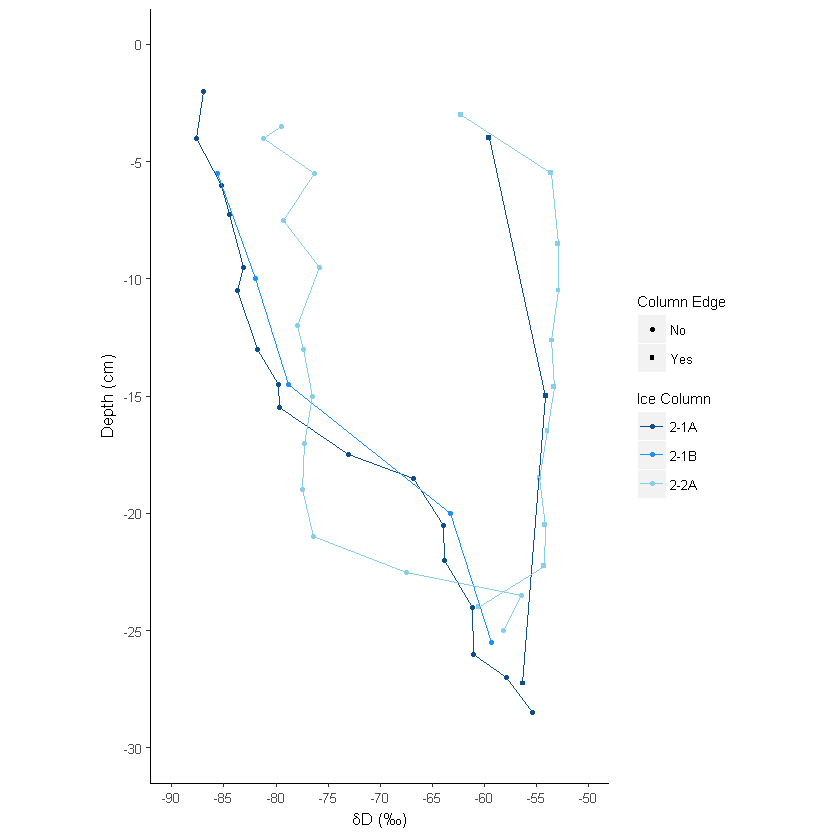

In [21]:
dD.depth = ggplot(no_bulk,aes(x=dD, y = depth, color = core,shape = edge)) + 
  geom_point(data = , size = 1) +
  labs(x = expression(paste(delta,"D (\u2030)")),
       y = "Depth (cm)") +
  geom_path(data = no_bulk,aes(color=core),size = 0.25) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"),
        plot.title = element_text(hjust = 0.5),text = element_text(size=10),
        legend.position = "right",legend.spacing = unit(0,"in"),
        legend.text = element_text(size = 8),
        legend.title = element_text(size = 9)) +
  coord_fixed(ratio = 2.25) +
  scale_shape_manual(name = "Column Edge",
                     values = c(16,15),
                     labels = c("No","Yes")) +
  scale_colour_manual(name  = "Ice Column",
                      breaks = c("2-A","2-B","3-A"),
                      labels = c("2-1A","2-1B","2-2A"),
                      values = c("dodgerblue4","dodgerblue","skyblue")) +
  scale_x_continuous(limits = c(-90,-50),breaks= c(-90,-85,-80,-75,-70,-65,-60,-55,-50)) +
  scale_y_continuous(limits = c(-30,0),breaks= c(0,-5,-10,-15,-20,-25,-30))

dD.depth